# Features Texte & Image : Réduction de dimension & Clustering
## Sommaire :
- [A - Preprocessing](#A)
- [B - Clustering & Visualisation](#B)
- [C - Réduction de dimensions](#C)
- [D - Clustering post-ACP](#D)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing 
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans

## Chargement des fichiers

In [24]:
#features images réduites
img_features = pd.read_csv("Data/bovw_cnn_reduit.csv")
img_features

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,16.500577,-9.898867,6.726766,21.268829,-9.111522,-2.850006,-4.191259,7.921969,-6.059114,1.987472,...,-0.283887,-0.897861,1.040627,-0.599666,0.022709,-2.585724,1.832759,-0.895182,1.108605,-0.405962
1,11.383964,-12.849003,-16.724852,1.694769,-3.936712,-13.463096,29.234463,-8.734372,19.446413,19.967092,...,-0.833737,-2.523593,-0.018941,2.001266,2.964289,0.130504,1.307673,0.515853,-0.943738,0.807973
2,10.174201,-10.553224,-11.390746,-11.471785,-3.123571,-8.225231,7.386229,-1.336850,-0.714988,4.485062,...,-0.942715,-1.104784,-1.425188,-1.138523,-1.870223,0.648394,0.619241,-0.013481,0.583882,0.081645
3,13.559567,-4.614267,-3.374166,9.040167,-7.454728,-11.273223,13.934011,-5.178134,-0.448142,7.388699,...,1.213639,0.305716,-0.479548,0.057699,-0.569960,1.129638,0.677060,-0.242096,-0.358171,-0.860383
4,26.627249,-10.091232,6.909178,21.104395,-10.760799,-16.266136,4.660330,-3.667069,-0.260545,-6.968356,...,-2.637277,-2.781893,0.052156,-2.402588,-2.713748,3.392383,1.301438,-1.367558,-1.793395,0.493148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,14.146963,-11.225107,5.246621,19.130014,-6.355734,-4.215832,-9.057777,5.757314,4.174275,-6.207536,...,0.370047,-0.698310,0.464719,0.557401,-1.710605,1.192266,-0.116375,-1.816212,-2.049739,-1.197027
1046,11.134835,-4.224716,7.469797,6.821539,-1.713025,10.084106,-8.703384,2.826520,7.223361,-1.965633,...,0.932729,-0.326893,2.221090,0.548403,-1.270396,0.577594,1.488400,0.573958,-0.935220,1.283788
1047,22.260387,1.141232,6.555011,16.718362,1.939536,3.111419,-5.822199,8.447978,4.467168,0.503355,...,-1.748121,-3.638716,2.675031,-3.581977,-0.023230,-0.524076,0.905457,-1.860207,0.626740,-0.049345
1048,12.236469,3.515671,7.140280,-2.404265,-2.498301,10.476003,1.755360,6.664267,6.377296,-5.336504,...,-2.579313,2.163887,0.714878,1.968313,-3.675448,3.753132,-0.976091,-0.442093,1.208180,0.213564


In [25]:
#features textuelles
txt_features = pd.read_csv("Data/bow_lem_reduit.csv")
txt_features

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,3.913046,-2.456696,-2.474950,-0.212832,0.570064,-3.833258,-0.902989,-4.026453,-0.633434,-0.930260,...,1.985816,0.000055,-0.646206,-1.969374,0.763310,-0.671386,0.827813,0.781242,1.145564,0.524149
1,4.048864,-3.043255,0.259510,-1.318654,-2.116602,-2.280708,-1.336881,-1.750270,1.250799,-0.586330,...,-0.499791,0.056460,-1.692044,0.467694,-0.792398,-0.683903,-0.059027,-0.760287,-0.712216,-0.605785
2,4.763428,-2.586639,-1.573157,-0.507533,-0.900169,1.044283,-2.735629,-0.684535,1.584612,4.465372,...,-0.901554,-0.428885,0.412335,-0.329036,0.733650,1.608033,-0.023611,-2.814296,0.100399,-0.590021
3,5.321930,-4.229243,-0.082532,-2.489553,-3.204805,-3.803415,-1.822088,-4.358461,-2.838748,1.817766,...,-0.997111,0.247126,0.792107,0.669928,0.107563,-0.999376,-0.533619,1.712146,0.862950,-0.031661
4,4.946264,-3.142388,-2.078266,-1.252483,-2.270336,-1.813985,-2.306194,-4.094045,-3.246737,-0.097765,...,-0.817143,0.287208,1.743204,1.645475,-0.307739,-2.128681,-1.299215,1.360560,0.081871,0.319145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1.595993,-0.772350,-2.948816,1.554730,2.140523,1.000634,-4.210744,2.677049,-0.782640,1.624400,...,-0.462359,2.575084,-2.307394,-2.405862,0.973278,-1.235023,0.921956,-0.926013,-0.112207,1.363823
1046,3.135646,0.568339,-4.190651,1.356140,3.166568,-1.332507,-5.082025,2.265987,-2.383425,0.499438,...,1.706491,-0.176040,-1.373776,1.773173,-0.738280,0.275361,-2.712849,-0.625232,-0.551682,0.375905
1047,-3.480592,0.905783,-0.656663,-1.436051,0.177833,-0.183084,0.078167,2.320766,-1.722392,-0.266121,...,-0.190554,-0.196588,0.361131,0.191637,0.496605,0.313287,0.331069,0.172846,-0.002842,-0.531330
1048,-1.795251,0.311085,-0.780774,-0.528926,0.630065,-0.194538,-1.390760,2.618257,-1.555879,-1.171897,...,-0.303500,-0.962306,1.187764,0.921730,1.119128,0.722343,0.182300,0.544307,0.266924,-1.433785


### Renommage des colonnes 
Renommage des colonnes pour différencier les features textes & images

In [26]:
col_dict = {}
for i in range(len(img_features.columns)):
    old = img_features.columns[i]
    new = 'img_'+old
    col_dict[old]=new

In [27]:
img_features=img_features.rename(columns=col_dict)
img_features

,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,...,img_225,img_226,img_227,img_228,img_229,img_230,img_231,img_232,img_233,img_234
0,16.500577,-9.898867,6.726766,21.268829,-9.111522,-2.850006,-4.191259,7.921969,-6.059114,1.987472,...,-0.283887,-0.897861,1.040627,-0.599666,0.022709,-2.585724,1.832759,-0.895182,1.108605,-0.405962
1,11.383964,-12.849003,-16.724852,1.694769,-3.936712,-13.463096,29.234463,-8.734372,19.446413,19.967092,...,-0.833737,-2.523593,-0.018941,2.001266,2.964289,0.130504,1.307673,0.515853,-0.943738,0.807973
2,10.174201,-10.553224,-11.390746,-11.471785,-3.123571,-8.225231,7.386229,-1.336850,-0.714988,4.485062,...,-0.942715,-1.104784,-1.425188,-1.138523,-1.870223,0.648394,0.619241,-0.013481,0.583882,0.081645
3,13.559567,-4.614267,-3.374166,9.040167,-7.454728,-11.273223,13.934011,-5.178134,-0.448142,7.388699,...,1.213639,0.305716,-0.479548,0.057699,-0.569960,1.129638,0.677060,-0.242096,-0.358171,-0.860383
4,26.627249,-10.091232,6.909178,21.104395,-10.760799,-16.266136,4.660330,-3.667069,-0.260545,-6.968356,...,-2.637277,-2.781893,0.052156,-2.402588,-2.713748,3.392383,1.301438,-1.367558,-1.793395,0.493148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,14.146963,-11.225107,5.246621,19.130014,-6.355734,-4.215832,-9.057777,5.757314,4.174275,-6.207536,...,0.370047,-0.698310,0.464719,0.557401,-1.710605,1.192266,-0.116375,-1.816212,-2.049739,-1.197027
1046,11.134835,-4.224716,7.469797,6.821539,-1.713025,10.084106,-8.703384,2.826520,7.223361,-1.965633,...,0.932729,-0.326893,2.221090,0.548403,-1.270396,0.577594,1.488400,0.573958,-0.935220,1.283788
1047,22.260387,1.141232,6.555011,16.718362,1.939536,3.111419,-5.822199,8.447978,4.467168,0.503355,...,-1.748121,-3.638716,2.675031,-3.581977,-0.023230,-0.524076,0.905457,-1.860207,0.626740,-0.049345
1048,12.236469,3.515671,7.140280,-2.404265,-2.498301,10.476003,1.755360,6.664267,6.377296,-5.336504,...,-2.579313,2.163887,0.714878,1.968313,-3.675448,3.753132,-0.976091,-0.442093,1.208180,0.213564


### Jointure des fichiers de features
On créer maintenant un unique fichier contenant les features provenant des images et les features provenant du texte

In [28]:
data=img_features.join(txt_features)
data

,img_0,img_1,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,...,63,64,65,66,67,68,69,70,71,72
0,16.500577,-9.898867,6.726766,21.268829,-9.111522,-2.850006,-4.191259,7.921969,-6.059114,1.987472,...,1.985816,0.000055,-0.646206,-1.969374,0.763310,-0.671386,0.827813,0.781242,1.145564,0.524149
1,11.383964,-12.849003,-16.724852,1.694769,-3.936712,-13.463096,29.234463,-8.734372,19.446413,19.967092,...,-0.499791,0.056460,-1.692044,0.467694,-0.792398,-0.683903,-0.059027,-0.760287,-0.712216,-0.605785
2,10.174201,-10.553224,-11.390746,-11.471785,-3.123571,-8.225231,7.386229,-1.336850,-0.714988,4.485062,...,-0.901554,-0.428885,0.412335,-0.329036,0.733650,1.608033,-0.023611,-2.814296,0.100399,-0.590021
3,13.559567,-4.614267,-3.374166,9.040167,-7.454728,-11.273223,13.934011,-5.178134,-0.448142,7.388699,...,-0.997111,0.247126,0.792107,0.669928,0.107563,-0.999376,-0.533619,1.712146,0.862950,-0.031661
4,26.627249,-10.091232,6.909178,21.104395,-10.760799,-16.266136,4.660330,-3.667069,-0.260545,-6.968356,...,-0.817143,0.287208,1.743204,1.645475,-0.307739,-2.128681,-1.299215,1.360560,0.081871,0.319145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,14.146963,-11.225107,5.246621,19.130014,-6.355734,-4.215832,-9.057777,5.757314,4.174275,-6.207536,...,-0.462359,2.575084,-2.307394,-2.405862,0.973278,-1.235023,0.921956,-0.926013,-0.112207,1.363823
1046,11.134835,-4.224716,7.469797,6.821539,-1.713025,10.084106,-8.703384,2.826520,7.223361,-1.965633,...,1.706491,-0.176040,-1.373776,1.773173,-0.738280,0.275361,-2.712849,-0.625232,-0.551682,0.375905
1047,22.260387,1.141232,6.555011,16.718362,1.939536,3.111419,-5.822199,8.447978,4.467168,0.503355,...,-0.190554,-0.196588,0.361131,0.191637,0.496605,0.313287,0.331069,0.172846,-0.002842,-0.531330
1048,12.236469,3.515671,7.140280,-2.404265,-2.498301,10.476003,1.755360,6.664267,6.377296,-5.336504,...,-0.303500,-0.962306,1.187764,0.921730,1.119128,0.722343,0.182300,0.544307,0.266924,-1.433785


## A - Preprocessing <a name=A ></a>
Centrage & Réduction des features

In [29]:
# On centre et réduit les valeurs numériques
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

In [30]:
pd.DataFrame(data_scaled)

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,1.211928,-0.768465,0.582556,2.007229,-0.901708,-0.306379,-0.490978,0.973999,-0.793677,0.270309,...,1.901962,0.000053,-0.626860,-1.922524,0.748715,-0.660750,0.823571,0.780042,1.156933,0.536365
1,0.836125,-0.997489,-1.448416,0.159942,-0.389591,-1.447297,3.424621,-1.073883,2.547264,2.715652,...,-0.478687,0.054499,-1.641386,0.456568,-0.777247,-0.673068,-0.058724,-0.759120,-0.719284,-0.619904
2,0.747271,-0.819264,-0.986469,-1.082641,-0.309119,-0.884221,0.865247,-0.164365,-0.093656,0.609997,...,-0.863485,-0.413987,0.399990,-0.321208,0.719622,1.582558,-0.023490,-2.809976,0.101396,-0.603773
3,0.995918,-0.358213,-0.292212,0.853159,-0.737746,-1.211884,1.632276,-0.636647,-0.058702,1.004910,...,-0.955007,0.238542,0.768392,0.653991,0.105506,-0.983544,-0.530884,1.709517,0.871514,-0.032399
4,1.955707,-0.783399,0.598353,1.991710,-1.064926,-1.748627,0.545926,-0.450863,-0.034128,-0.947741,...,-0.782638,0.277232,1.691015,1.606330,-0.301855,-2.094957,-1.292557,1.358471,0.082683,0.326584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1.039060,-0.871423,0.454371,1.805380,-0.628985,-0.453207,-1.061058,0.707857,0.546784,-0.844264,...,-0.442835,2.485639,-2.238314,-2.348627,0.954668,-1.215457,0.917232,-0.924591,-0.113320,1.395611
1046,0.817827,-0.327971,0.646904,0.643777,-0.169527,1.084052,-1.019543,0.347518,0.946180,-0.267339,...,1.634432,-0.169925,-1.332647,1.730990,-0.724163,0.270998,-2.698947,-0.624272,-0.557157,0.384667
1047,1.634972,0.088596,0.567681,1.577782,0.191943,0.334481,-0.682032,1.038672,0.585149,0.068459,...,-0.182508,-0.189760,0.350319,0.187078,0.487110,0.308323,0.329373,0.172581,-0.002870,-0.543714
1048,0.898739,0.272927,0.618367,-0.226901,-0.247240,1.126182,0.205629,0.819366,0.835355,-0.725799,...,-0.290685,-0.928880,1.152203,0.899802,1.097730,0.710900,0.181366,0.543471,0.269573,-1.467203


## B - Clustering & Visualisation <a name=B ></a>
Clustering sur les features avant réduction de dimension et projection t-SNE

In [31]:
#chargement des catégories "cibles"
categ = pd.read_csv("Data/data_txt.csv")
categ = categ['clean_category']
categ

0       HomeFurnishing
1             BabyCare
2             BabyCare
3       HomeFurnishing
4       HomeFurnishing
             ...      
1045          BabyCare
1046          BabyCare
1047          BabyCare
1048          BabyCare
1049          BabyCare
Name: clean_category, Length: 1050, dtype: object

In [32]:
color = ['purple','deepskyblue','red','chocolate','darkorange','forestgreen','royalblue']

In [33]:
#kmeans
kmeans = MiniBatchKMeans(n_clusters=7, random_state=5)
kmeans.fit(data_scaled)

MiniBatchKMeans(n_clusters=7, random_state=5)

In [34]:
kmeans.labels_

array([4, 4, 4, ..., 6, 3, 3])

In [35]:
tsne = TSNE(perplexity=40)
tsne_results = tsne.fit_transform(data_scaled)
tsne_proj = tsne_results
tsne_results = pd.DataFrame(tsne_results)
tsne_results

,0,1
0,3.420797,34.841866
1,19.978167,10.281750
2,15.025794,10.462732
3,18.635145,20.821753
4,17.281540,23.710978
...,...,...
1045,-5.178663,4.444868
1046,-11.805319,13.483469
1047,-6.931360,-4.928106
1048,-26.893423,30.632317


<AxesSubplot:xlabel='0', ylabel='1'>

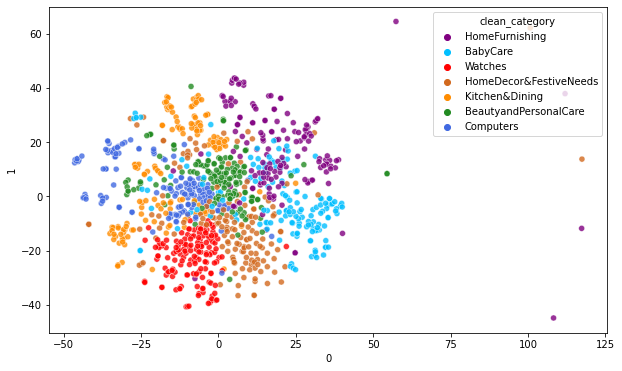

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=tsne_results[0], y=tsne_results[1],
    hue=categ,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

Sur la projection t-SNE ci dessus on peut observer que les produits forment un amas. Malgrès tout les individus ont l'air de se regrouper suivant leur catégories.

<AxesSubplot:xlabel='0', ylabel='1'>

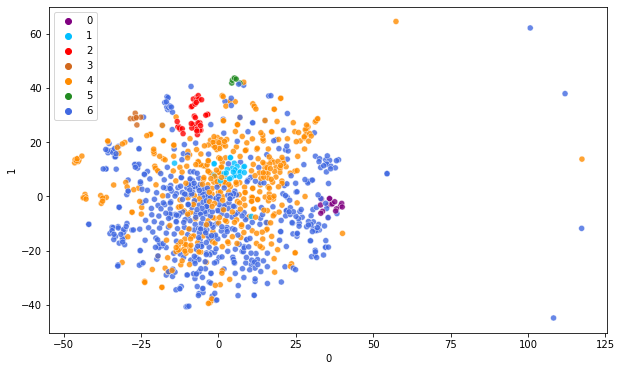

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=tsne_results[0], y=tsne_results[1],
    hue=kmeans.labels_,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

In [38]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(categ,kmeans.labels_)

0.031698616150308764

Sur cette projection on a colorer les individus en fonction de la classe attribué par le k-means. On peut voir ici que le résultat est très différent des catégories que l'on cherche à obtenir. Les classes sont très déséquilibrée avec une classe qui domine largement. Observation qui est confirmé par la valeur de l'Adjusted Rand Score très proche de 0. <br>

On va maintenant réaliser une réduction de dimension et voir si les performances sont meilleures.

## C - Réduction de dimensions <a name=C ></a>

In [39]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(data_scaled)

PCA()

In [40]:
#nombre de composantes calculées
n_comp=pca.n_components_
n_comp

308

In [41]:
#variance expliquée / eigen values
eigval=pca.explained_variance_
pd.DataFrame(eigval)

,0
0,1.972624
1,1.955195
2,1.929857
3,1.905058
4,1.900098
...,...
303,0.101808
304,0.096848
305,0.072050
306,0.046712


In [42]:
#nombre de valeurs propres > 1
pd.DataFrame(eigval)[pd.DataFrame(eigval)[0]>1].T

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1.972624,1.955195,1.929857,1.905058,1.900098,1.893755,1.889293,1.879933,1.867851,1.846577,...,1.000953,1.000953,1.000953,1.000953,1.000953,1.000953,1.000953,1.000953,1.000953,1.000953


In [43]:
len(pd.DataFrame(eigval)[pd.DataFrame(eigval)[0]>1])

235

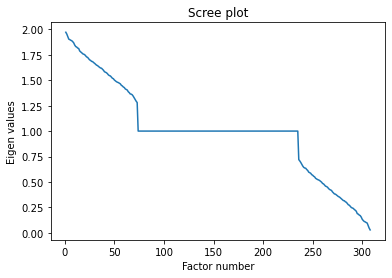

In [44]:
#scree plot
plt.plot(np.arange(1,n_comp+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
#plt.xlim(0, 10)
plt.show()

In [45]:
#proportion de variance expliquée
prop_eigval=pca.explained_variance_ratio_
pd.DataFrame(prop_eigval.cumsum())

,0
0,0.006399
1,0.012741
2,0.019000
3,0.025180
4,0.031343
...,...
303,0.999206
304,0.999520
305,0.999754
306,0.999905


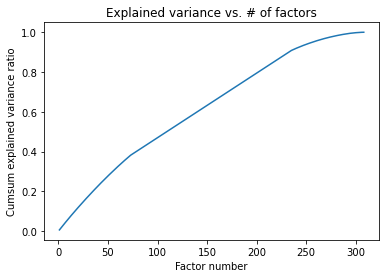

In [46]:
#cumul de variance expliquée
plt.plot(np.arange(1,n_comp+1),np.cumsum(prop_eigval))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
#plt.xlim(0, 10)
plt.show()

In [47]:
pd.DataFrame(prop_eigval.cumsum()).iloc[234]

0    0.908472
Name: 234, dtype: float64

In [48]:
# Calcul des composantes principales
pca = decomposition.PCA(235)
data_reduit=pd.DataFrame(pca.fit_transform(data_scaled))
data_reduit

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,-0.438139,-1.715786,1.568743,4.892671,5.725807,1.445681,3.263165,1.738179,2.920385,0.519002,...,0.553934,-1.026490,0.491185,0.034363,-0.330043,-0.065876,-0.884381,-0.459500,0.239099,-0.246035
1,-0.562465,-1.390675,1.432773,-1.553606,1.364646,-2.659476,0.648432,-0.138378,-2.008710,1.148432,...,1.931319,0.779092,-1.145905,-0.921048,0.475115,0.950291,-0.185297,-0.869485,-0.516546,0.523254
2,-0.790697,-1.138566,0.873579,0.152947,0.669761,-1.180249,0.617777,0.202718,-2.166092,0.029903,...,-1.264847,-0.371757,-0.209665,-0.828691,-0.029268,-0.589314,0.157309,0.297176,-0.527528,-0.032948
3,-0.271605,-1.434702,0.855876,-2.046013,0.549524,-2.827035,0.672895,-0.424716,-1.973544,-0.444130,...,0.646560,0.718316,0.393147,-0.661970,0.699890,-0.176514,-1.140701,-0.569876,0.783542,-0.694940
4,-0.434648,-1.653134,0.903346,-2.764505,0.486488,-3.619967,0.772188,-0.666385,-1.161889,-1.089791,...,-1.080834,-0.434717,-1.547290,0.566029,-0.105808,-0.059653,-1.209873,1.052394,0.601447,0.263247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.507106,-0.710669,0.060120,0.574033,2.677081,-0.634567,-0.336066,0.254597,0.454686,-0.706494,...,-0.470617,0.120392,-1.141380,0.555520,0.202790,-0.696801,-0.199438,-0.943980,-0.304793,-1.080455
1046,-0.821569,-1.127453,-0.042892,-1.347856,2.783651,-0.126197,-1.160939,-1.202784,0.818203,-2.630074,...,-0.988389,0.204688,0.197507,0.540736,-0.435750,0.451869,0.483973,-0.310062,-1.080620,-0.486680
1047,-0.573450,-0.813753,-0.464477,-0.273678,1.185500,0.008827,-0.086000,-0.511300,1.222170,-1.052540,...,0.244543,2.107375,1.372107,-1.132869,-0.421575,2.125644,-1.996429,0.674662,-1.545697,0.580177
1048,-1.017665,-0.489971,0.558951,-1.032629,1.943651,-0.087673,0.244768,-0.829582,0.718849,-1.652566,...,0.537493,1.654139,1.406185,1.228273,-1.980439,0.440530,-0.360701,-0.865065,1.584068,0.607118


## D - Clustering post-ACP <a name=D ></a>
Clustering sur la matrice post-acp

In [49]:
#kmeans sur la matrice post-ACP 
kmeans = MiniBatchKMeans(n_clusters=7, random_state=5)
kmeans.fit(data_reduit)

MiniBatchKMeans(n_clusters=7, random_state=5)

In [50]:
kmeans.labels_

array([1, 2, 1, ..., 3, 3, 3])

In [51]:
tsne = TSNE(perplexity=40)
tsne_results = tsne.fit_transform(data_reduit)
tsne_proj = tsne_results
tsne_results = pd.DataFrame(tsne_results)
tsne_results

,0,1
0,-37.889042,-7.179235
1,6.086478,19.639734
2,7.747913,14.830006
3,-18.567825,20.459267
4,-20.931316,33.835186
...,...,...
1045,6.383582,0.027761
1046,-31.813595,3.302274
1047,17.993828,20.873575
1048,-38.504723,5.508710


<AxesSubplot:xlabel='0', ylabel='1'>

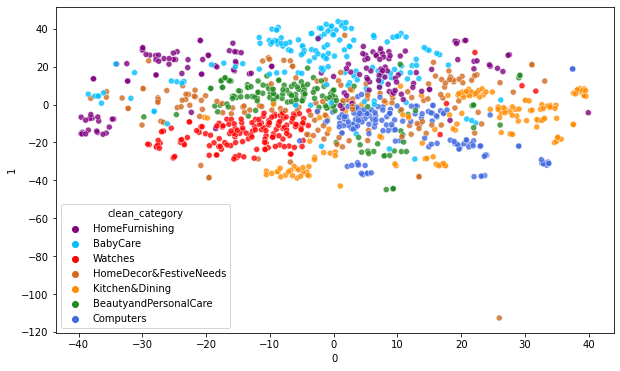

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=tsne_results[0], y=tsne_results[1],
    hue=categ,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

On peut voir ici que la réduction de dimension à crée de l'espace entre les individus, c'est ce que l'on recherche car cela signifie que l'on arrive a mieux discriminer les individus entre eux.

<AxesSubplot:xlabel='0', ylabel='1'>

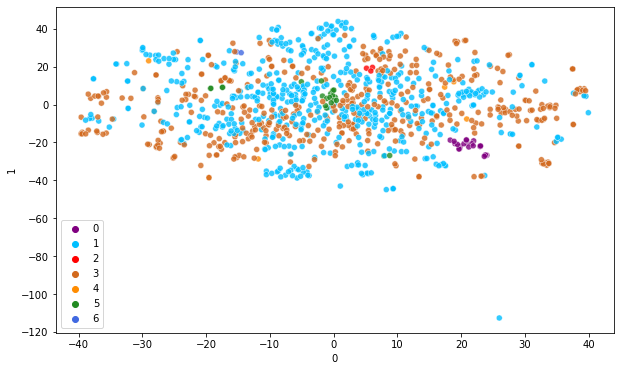

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=tsne_results[0], y=tsne_results[1],
    hue=kmeans.labels_,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

In [54]:
adjusted_rand_score(categ,kmeans.labels_)

0.017041886632577986

Même si la réduction nous a permis de mieux discriminer les individus on peut voir que le k-means n'est pas plus performant, ce qui est confirmé par l'Adjusted Rand Score, très proche de 0 et plus petit qu'avant réduction de dimension. <br>
Cette méthode ne semble donc pas être la meilleure méthode pour prédire la catégorie des produit. Par contre prises séparément les méthodes se basant sur les features de Texte et d'Images sont plus performantes. Il s'agiras donc de trouver une meilleure méthode pour conjuguer les décisions des 2 méthodes.